### OPERATORNORM WITHOUT ADJOINT 

- Creator:  Jonas Bresch, M.Sc
- Date: February 14rd, 2025

In [244]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

import imp

In [245]:
import adjointfreenorm
imp.reload(adjointfreenorm)

<module 'adjointfreenorm' from '/Users/jonasbresch/Desktop/operator norm without adjoint/github/finale/adjointfreenorm.py'>

### DATA

In [237]:
#
# random matrix
#

A = np.random.randn(50, 100)
V = np.random.randn(100, 50)

In [223]:
#
# random orthogonal matrix
#

n = 100
H = np.random.randn(n, n)
Q, R = sc.linalg.qr(H)
Aort = Q.dot(Q.T)

### Algorithms
    - MatFreeAdjNorm for computing ||A|| from Bresch, Lorenz, Schneppe, Winkler (2024)
    - MatFreeAdjOpNormDouble for computing ||A - V|| with two stepsizes
    - MatFreeAdjOpNorm for computing ||A - V|| with one stepsize

In [249]:
vv, optvv, vvsol, vvval, listtau, lista, listerror = adjointfreenorm.MatFreeAdjNorm(
    A=A, 
    # A=Aort,
    iter=100000, 
    eps=1e-10, 
    nor=1, 
    show=0)

iter. 	| func-value 	| residuum  	| sing-vec-error
45962 	|  2.793e+02 	|  2.052e-11 	|  7.350e-14
||A|| =  16.71150442737686


In [250]:
u, v, vu_sol, optu, optv, val, listtau_uv, listabcd_uv, listbc_uv, listerror_uv, listapprox_norm, listapprox_a, listapprox_a_min, listapprox_sig = adjointfreenorm.MatFreeAdjOpNormDouble(
    A=A, 
    V=V,        # optinal argument, if it is left free, we compute just ||A||
    # V=A.T, 
    iter=100000, 
    eps=1e-7, 
    show=0)

iter. 	| func-value 	| residuum 	| sing-vec-error
46003 	|  2.299e+01 	|  6.331e-09 	|  2.827e-06
||A|| =  22.98529823340499


In [251]:
u_o, v_o, vu_sol_o, optu_o, optv_o, vvvual_o, listtau_uv_o, lista_uv_o, listerror_uv_o = adjointfreenorm.MatFreeAdjOpNorm(
    A=A, 
    V=V,        # optinal argument, if it is left free, we compute just ||A||
    # V=A.T, 
    iter=200000, 
    eps=1e-9,
    show=0)

iter 	| func-value 	| residuum  	| sing-vec-error
46996 	|  2.299e+01 	|  6.599e-09 	|  2.583e-06
||A|| =  22.985298233136817


### Experiments

iter. 	| func-value 	| residuum 	| sing-vec-error
5681 	|  1.844e+01 	|  2.603e-07 	|  4.382e-10
||A|| =  18.4426227448591
iter. 	| func-value 	| residuum 	| sing-vec-error
14488 	|  1.940e+01 	|  1.631e-07 	|  8.341e-11
||A|| =  19.397887477059975
iter. 	| func-value 	| residuum 	| sing-vec-error
6025 	|  1.932e+01 	|  3.276e-08 	|  4.180e-11
||A|| =  19.31892573866257
iter. 	| func-value 	| residuum 	| sing-vec-error
6252 	|  1.929e+01 	|  2.481e-07 	|  3.912e-10
||A|| =  19.286990922582024
iter. 	| func-value 	| residuum 	| sing-vec-error
3248 	|  2.041e+01 	|  2.098e-04 	|  1.237e-03
||A|| =  20.410163063076418
iter. 	| func-value 	| residuum 	| sing-vec-error
5710 	|  1.943e+01 	|  9.641e-08 	|  1.887e-10
||A|| =  19.434917931955347
iter. 	| func-value 	| residuum 	| sing-vec-error
8169 	|  1.938e+01 	|  2.256e-08 	|  3.218e-11
||A|| =  19.38384517683601
iter. 	| func-value 	| residuum 	| sing-vec-error
14419 	|  1.924e+01 	|  1.110e-06 	|  6.156e-10
||A|| =  19.241295453611958
it

[]

Python(48373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(48374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(48375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(48376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(48377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(48378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(48380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(48381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(48382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(48384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(48385) Malloc

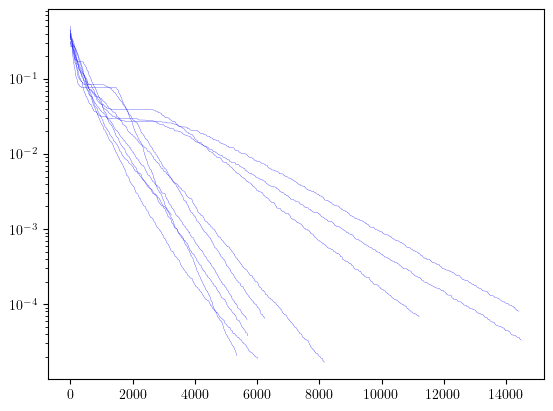

In [ ]:
for k in range(10):
    A = np.random.randn(50, 50)
    V = np.random.randn(50, 50)
    _, _, vu_sol, _, _, _, _, _, _, _, _, _, listapprox_a_min, _ = adjointfreenorm.MatFreeAdjOpNormDouble(A, V, iter=20001, eps=1e-7, nor=1, show=0)
    if np.min(listapprox_a_min/np.abs(vu_sol[0])**2) < 1e-2:
        plt.plot(listapprox_a_min/np.abs(vu_sol[0])**2, linewidth=0.2, c='b')
        plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.semilogy()

iter 	| func-value 	| residuum  	| sing-vec-error
10001 	|  2.424e+01 	|  6.974e-03 	|  6.764e-03
||A|| =  24.242822670957544
iter. 	| func-value 	| residuum 	| sing-vec-error
10001 	|  2.425e+01 	|  5.590e-07 	|  5.766e-05
||A|| =  24.24979576423797


/usr/local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


iter 	| func-value 	| residuum  	| sing-vec-error
10001 	|  2.336e+01 	|  2.873e-04 	|  1.421e-03
||A|| =  23.363512765352652
iter. 	| func-value 	| residuum 	| sing-vec-error
10001 	|  2.336e+01 	|  5.978e-08 	|  2.075e-05
||A|| =  23.363800019498505
iter 	| func-value 	| residuum  	| sing-vec-error
10001 	|  2.264e+01 	|  2.166e-01 	|  3.247e-02
||A|| =  22.642383127990477
iter. 	| func-value 	| residuum 	| sing-vec-error
10001 	|  2.286e+01 	|  1.627e-06 	|  1.006e-04
||A|| =  22.859000357345217
iter 	| func-value 	| residuum  	| sing-vec-error
10001 	|  2.420e+01 	|  1.013e-01 	|  1.858e-02
||A|| =  24.195523863380856
iter. 	| func-value 	| residuum 	| sing-vec-error
10001 	|  2.430e+01 	|  5.851e-04 	|  1.620e-03
||A|| =  24.296235145884303
iter 	| func-value 	| residuum  	| sing-vec-error
10001 	|  2.266e+01 	|  1.976e-01 	|  1.407e-02
||A|| =  22.66139455355364
iter. 	| func-value 	| residuum 	| sing-vec-error
10001 	|  2.286e+01 	|  1.377e-05 	|  2.301e-04
||A|| =  22.858965181

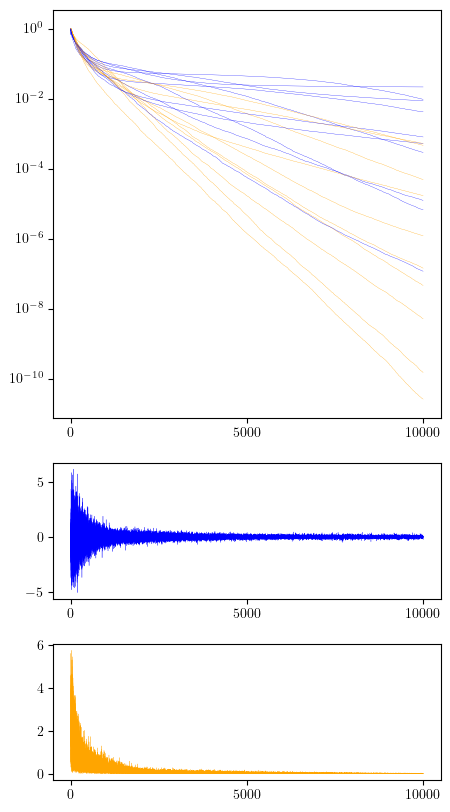

In [192]:
fig, axs = plt.subplots(3, 1, figsize=(5,10), gridspec_kw={'height_ratios': [3, 1, 1]})
for k in range(10):
    A = np.random.randn(100,50)
    V = np.zeros((50,100))
    V = np.random.randn(50,100)
    _, _, vu_sol_o, _, _, vvvual_o, _, lista_uv_o, _ = adjointfreenorm.MatFreeAdjOpNorm(A=A, V=V, iter=10001, eps=1e-10, nor=1, show=0)
    # _, _, vvsol, vvval, _, lista, _ = adjointfreenorm.MatFreeAdjNorm(A=A, iter=10001, eps=1e-8, nor=1, show=0)
    _, _, vu_sol, _, _, vuval, _, _, listbc_uv, _, _, _, _, _ = adjointfreenorm.MatFreeAdjOpNormDouble(A=A, V=V, iter=10001, eps=1e-10, nor=1, show=0)
    axs[0].plot((vu_sol_o-np.abs(vvvual_o))/vu_sol_o, linewidth=0.2, c='b')
    # axs[0].plot((vvsol-np.abs(vvval))/vvsol, linewidth=0.2, c='b')
    axs[0].plot((vu_sol**2-np.abs(vuval)**2)/vu_sol**2, linewidth=0.2, c='orange')
    axs[0].semilogy()
    # axs[0].semilogy()
    # axs[1].semilogy()
    axs[1].plot(lista_uv_o, linewidth=0.2, c='b')
    # axs[1].plot(lista, linewidth=0.2, c='b')
    axs[2].plot(listbc_uv, linewidth=0.2, c='orange')
    plt.setp(axs, xticks=[0, 5000, 10000], xticklabels=['0', '5000', '10000'])
    plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()